# Деревья решений - Decision Trees

## Данные

Мы будем использовать один и тот же набор данных для всех методов классификации на основе деревьев (Деревья решений - Decision Tree, Случайные леса - Random Forests и Расширяемые деревья - Gradient Boosted Tre Этоes). позволит нам сравнивать работу этих методов между собой.

Мы будем работать с набором данных "Palmer Penguins" - он достаточно простой для того, чтобы мы могли понять влияние гиперпараметров на результаты классификации.

<img src="penguin.jpg" style="max-width:400px">

Данные были собраны и предоставлены Кристиной Горман и антарктической станцией Палмер, расположенной на острове Анверс, к северу от Южного полярного круга.  

Более подробно см. следующую работу на английском языке: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081


* penguins_size.csv: Упрощённые данные из исходного набора данных о пингвинах. Содержит следующие переменные:

    * species: разновидности пингвинов - Антарктический пингвин (Chinstrap), Пингвин Адели (Adélie) или Папуанский пингвин (Gentoo)
    * culmen_length_mm: длина клюва (mm)
    * culmen_depth_mm: высота клюва (mm)
    * flipper_length_mm: длина крыла (mm)
    * body_mass_g: масса тела (g)
    * island: название острова (Dream, Torgersen или Biscoe) на архипелаге Палмер (Антарктика)
    * sex: пол пингвина

**Наша цель - создать модель, которая поможет нам определять вид пингвина на основе его физических атрибутов, чтобы исследователи могли с помощью этой модели классифицировать пингвинов, без необходимости привлечения опытного биолога.**

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Исследование данных - EDA

### Отсутствующие значения - Missing Data

Если какие-то значения отсутствуют и их немного, то мы можем удалить такие данные. Однако для использования нашей будущей модели мы предполагаем, что для новых пингвинов все признаки будут измеряться без пропусков.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# Какой процент данных мы удаляем?
100*(10/344)

2.9069767441860463

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
df = df[df['sex']!='.']

## Визуализация

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

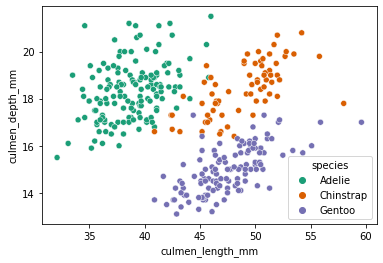

In [ ]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

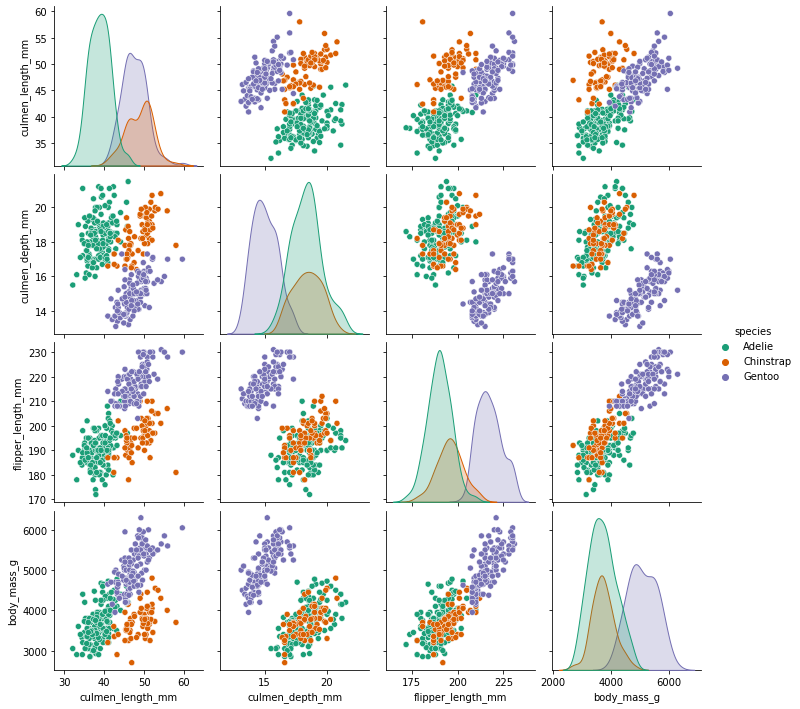

In [ ]:
sns.pairplot(df,hue='species',palette='Dark2')

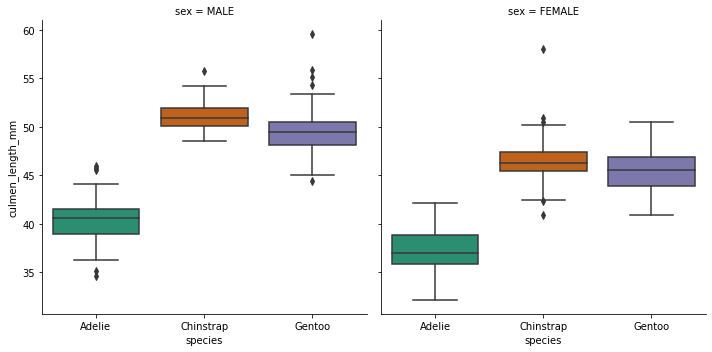

In [ ]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Построение признаков - Feature Engineering

In [ ]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [ ]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [ ]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Классификатор "Дерево решений" - Decision Tree Classifier

## Гиперпараметры по умолчанию

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
base_pred = model.predict(X_test)
base_pred

array(['Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'A

## Оценка работы модели

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,base_pred)

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 1,  0, 32]], dtype=int64)

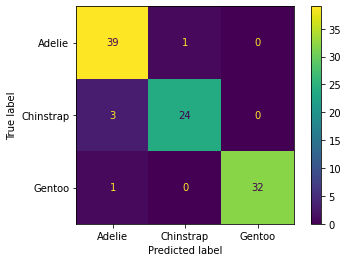

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [ ]:
model.feature_importances_

array([0.34035881, 0.02010577, 0.57575804, 0.        , 0.03806069,
       0.        , 0.02571668])

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.340359
culmen_depth_mm,0.020106
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.025717


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

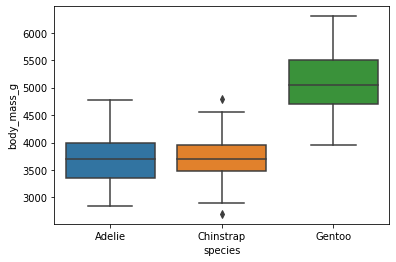

In [ ]:
sns.boxplot(x='species',y='body_mass_g',data=df)

## Визуализация дерева

Эта функция относительно новая, при желании Вы можете посмотреть онлайн-документацию:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [ ]:
from sklearn.tree import plot_tree

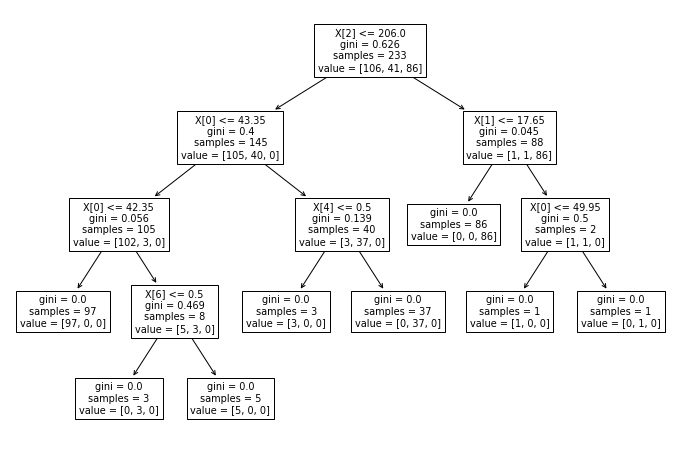

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model);

[Text(755.625, 815.4, 'flipper_length_mm <= 206.0\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(465.0, 634.2, 'culmen_length_mm <= 43.35\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(232.5, 453.0, 'culmen_length_mm <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(116.25, 271.80000000000007, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(348.75, 271.80000000000007, 'sex_MALE <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(232.5, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(465.0, 90.60000000000002, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(697.5, 453.0, 'island_Dream <= 0.5\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(581.25, 271.80000000000007, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(813.75, 271.80000000000007, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(1046.25, 634.2, 'culmen_depth_mm <= 17.65\ngini = 0.045\nsamples = 88\nvalue = [1, 1, 86]'),


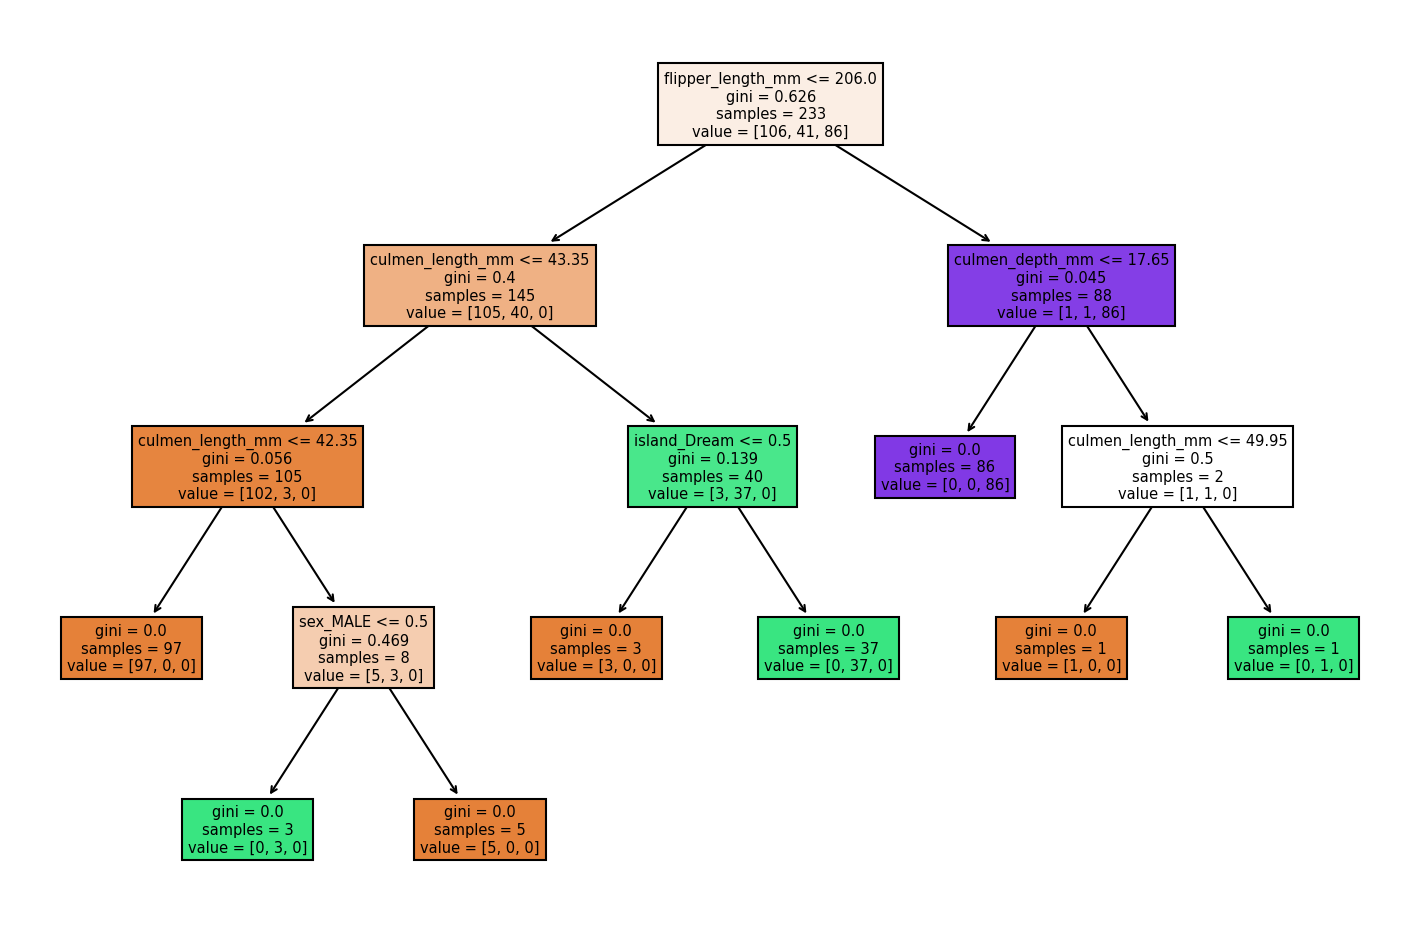

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns)

## Результаты модели

Чтобы поэкспериментировать с гиперпараметрами, давайте создадим функцию, которая возвращает результаты классификации, а также рисует дерево.

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## Гиперпараметры

### Гиперпараметр "Max Depth"

In [ ]:
DecisionTreeClassifier?

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=10)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100





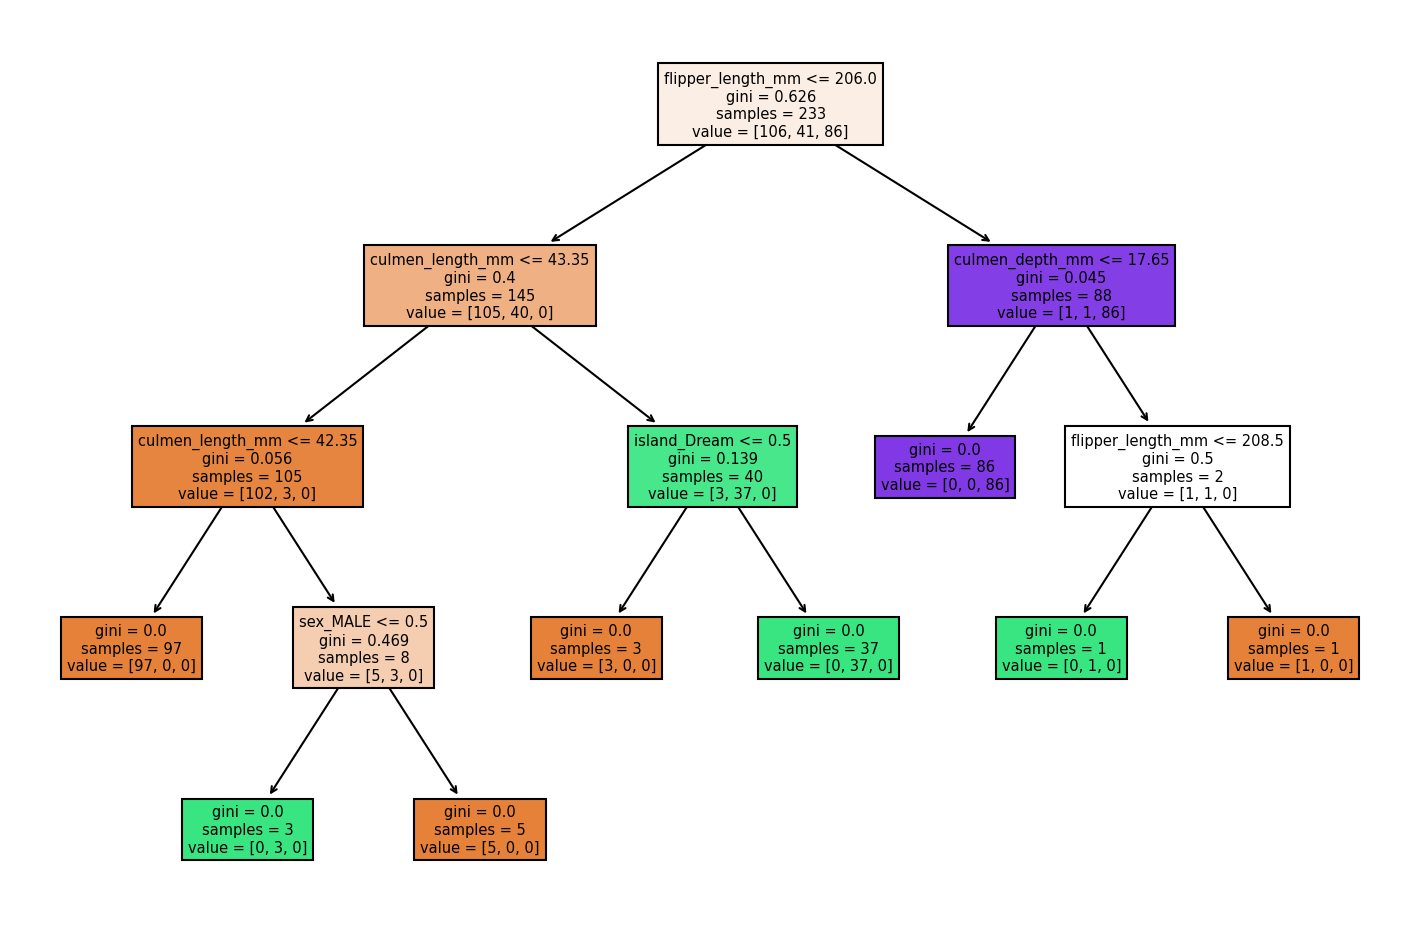

In [ ]:
report_model(pruned_tree)

## Гиперпараметр "Max Leaf Nodes"

In [ ]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





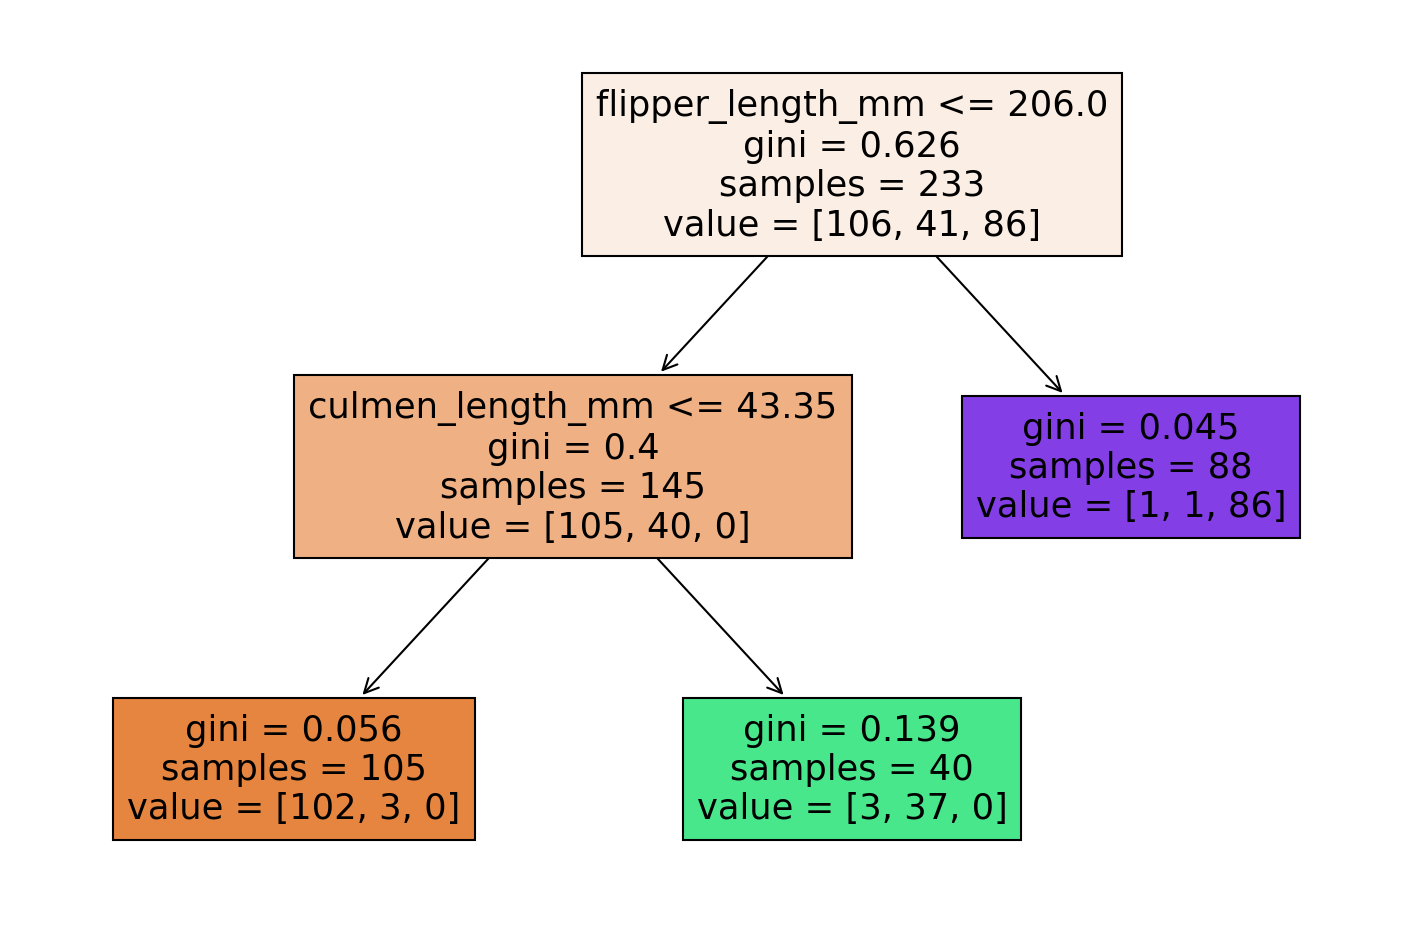

In [ ]:
report_model(pruned_tree)

## Гиперпараметр "Criterion"

In [ ]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100





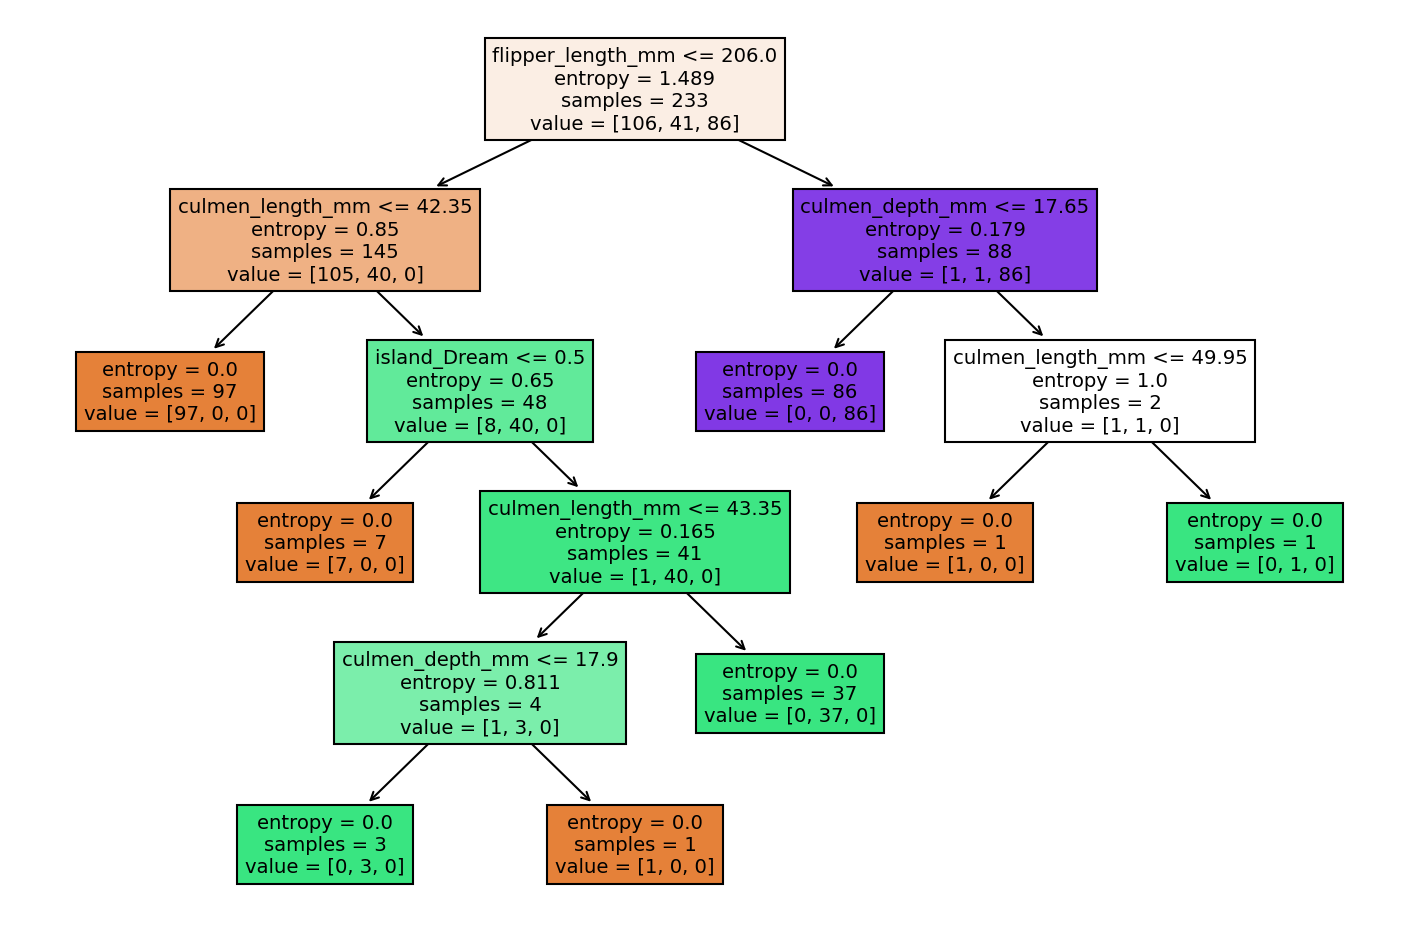

In [ ]:
report_model(entropy_tree)

---

In [ ]:
from sklearn.tree import export_graphviz